In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import Data
December_data=pd.DataFrame(pd.read_csv("Parking_Violations_Issued_in_December_2018.csv"))

#Clean Data
December_data=December_data.drop(columns=["ROWID_","DAY_OF_WEEK",
                          "BODY_STYLE","HOLIDAY",
                          "WEEK_OF_YEAR","MONTH_OF_YEAR","ISSUE_TIME"])
December_data.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.026516,38.897354,5373144,P034,"METER, FAIL TO DEPOSIT PAYMENT",1000 BLOCK F ST NW SOUTH SIDE,DC,813477,11599.0,397700,136611,2018-12-07T10:09:00.000Z
1,-77.053032,38.899362,5373145,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,800 BLOCK NEW HAMPSHIRE AVE NW *,DC,811580,9940.0,395400,136835,2018-12-07T10:48:00.000Z
2,-77.031951,38.908045,5373146,P385,"STOPPING, STANDING OR PARKING VEHICLE IN BIKE ...",BLOCK 1400 14TH ST NW WEST SIDE,DC,802156,1804.0,397229,137798,2018-12-31T15:28:00.000Z
3,-77.027555,38.901335,5373147,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1200 BLOCK EYE ST NW NORTH SIDE,DC,801091,919.0,397610,137053,2018-12-06T20:59:00.000Z
4,-77.007473,38.902527,5373148,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,UNIT BLOCK K ST NE SOUTH SIDE,DC,808361,7159.0,399352,137185,2018-12-07T13:03:00.000Z


In [4]:
December_data["VIOLATION_DESCRIPTION"].value_counts()

FAIL TO DISPLAY A MULTISPACE METER RECEIPT            11607
PARK AT EXPIRED METER                                  8533
RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT       8515
DISOBEYING OFFICIAL SIGN                               6694
FAILURE TO DISPLAY CURRENT TAGS                        4913
NO STOPPING OR STANDING IN PM RUSH HOUR ZONE           4687
NO PARKING ANYTIME                                     3797
NO STOPPING OR STANDING IN AM RUSH HOUR ZONE           3036
NO STANDING ANYTIME                                    3019
UNAUTHORIZED VEHICLE IN LOADING ZONE                   2779
FAILURE TO SECURE DC TAGS                              2422
PARK OVERTIME AT A METER                               2073
PARK OVERTIME IN TIMED ZONE                            1702
NO FRONT TAGS.                                         1672
PARKED WITHIN 25 FEET OF A STOP SIGN                   1579
RELOCATE TOW FEE                                       1497
PARK IN A BUS ZONE                      

In [5]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "FAIL TO DISPLAY A MULTISPACE METER RECEIPT":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL DISPLAY MULTI SPACE RECEIPT PROPERLY BE":"FAIL TO DISPLAY METER RECEIPT",
    "FAILURE TO DISPLAY MULI-SPACE RECEIPT PROPERLY BZ":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL TO DISPLAY MULTI-SPACE METER RECEIPT PROPERLY":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL TO DISPLAY METER RECEIPT IN A LOADING ZONE":"FAIL TO DISPLAY METER RECEIPT",
    })

In [6]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT":"PARKED BEYOND TIME LIMIT",
    "OVERTIME AT A MULTISPACE METER IN A LOADING ZONE":"PARKED BEYOND TIME LIMIT",
    "IND. W/ DISABILITIES PARKED BEYOND TIME LIMIT":"PARKED BEYOND TIME LIMIT",
    "PKING BEYOND LIMIT":"PARKED BEYOND TIME LIMIT"})

In [7]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "NO PARKING ANYTIME":"NO PARKING","EMERGENCY NO PARKING":"NO PARKING","NO PARKING SPECIFIC HOURS":"NO PARKING",
    "NO PARKING STREET CLEANING":"NO PARKING","NO PARKING 7 AM TO 6:30 PM":"NO PARKING",
    "NO PARKING EXC. ELECTRIC VEHICLE BEING CHARGED":"NO PARKING",
    })

In [8]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "EXPIRATION TIME ON METER RECEIPT LAPSED":"EXPIRED OR UNPAID METER","PARK OVERTIME AT A METER":"EXPIRED OR UNPAID METER",
    "PARK AT EXPIRED METER":"EXPIRED OR UNPAID METER",
    "IND. W/ DISABILITIES METER  NO PROOF OF PAYMENT":"EXPIRED OR UNPAID METER",
    "FAIL TO REMOVE EXPIRED RESIDENTIAL PARKING PERMIT":"EXPIRED OR UNPAID METER",
    "EXPIRED HANDICAP METER":"EXPIRED OR UNPAID METER","METER, FAIL TO DEPOSIT PAYMENT":"EXPIRED OR UNPAID METER",
    "IND. W/ DISABILITIES AMOUNT OF PAYMENT HAS LAPSED":"EXPIRED OR UNPAID METER",})

In [9]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "NO FRONT TAGS.":"PKING BEYOND LIMIT","PARK OVERTIME IN TIMED ZONE":"PKING BEYOND LIMIT",
    "LOADING ZONE, OVERTIME PARKING BY CMV VALID DECAL":"PKING BEYOND LIMIT",
    "RPP BEYOND 2 HOUR PERIOD W/O VALID PERMIT BE":"PKING BEYOND LIMIT","OVERTIME BALL PARK EVENT":"PKING BEYOND LIMIT",
    "RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT":"PKING BEYOND LIMIT",
    "PARK MORE THAN 72 HOURS":"PKING BEYOND LIMIT"})

In [10]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "UNAUTHORIZED VEHICLE IN LOADING ZONE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "COMMERCIAL MOTOR VEHICLE - OUT OF SERVICE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "TINTED WINDOWS":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "TINTED WINDOWS , FAIL TO COMPLY 1ST":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "FAIL TO REGISTER APPORTIONABLE VEHICLE UNDER IRP":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "COMMERCIAL MOTOR VEHICLE - NOT OUT OF SERVICE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "BUS LANE, UNAUTHORIZED VEHICLE PARKED IN":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    })

In [11]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "FAILURE TO SECURE DC TAGS":"FAILURE TO DISPLAY OR SECURE TAGS","ILLEGIBLE TAGS.":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAILURE TO DISPLAY CURRENT TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "OBSTRUCTED TAGS.":"FAILURE TO DISPLAY OR SECURE TAGS",
    "NO REAR TAGS.":"FAILURE TO DISPLAY OR SECURE TAGS","IMPROPERLY DISPLAYED TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAIL TO SECURE TAGS IN THE DISTRICT OF COLUMBIA":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAIL TO DISPLAY CURRENT DC VEHICLE TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAIL TO PROPERLY AFFIX VALIDATION STICKERS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "IMPROPER DISPLAY OF TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
})

In [12]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "NO STANDING ANYTIME":"NO STOPPING OR STANDING","NO STOPPING OR STANDING IN AM RUSH HOUR ZONE":"NO STOPPING OR STANDING",
    "NO STOPPING OR STANDING IN PM RUSH HOUR ZONE":"NO STOPPING OR STANDING",
    "NO STANDING COMMERCIAL VEHICLE":"NO STOPPING OR STANDING","NO STOPPING OR STANDING ANYTIME":"NO STOPPING OR STANDING",
    "STOPPING, STANDING OR PARKING VEHICLE IN BIKE LANE":"NO STOPPING OR STANDING",
    "NO STOPPING ANYTIME":"NO STOPPING OR STANDING"
    })

In [13]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "PARK IN OFFICIAL PARKING PERMIT ONLY SPACE":"NO PERMIT","FAIL TO DISPLAY RESIDENTIAL PARKING PERMIT":"NO PERMIT",
    "RESIDENTIAL PMT PKG 2ND OFFENSE CALENDAR YEAR":"NO PERMIT",})

In [14]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "FAIL TO DISPLAY CURRENT INSPECTION STICKER":"INSPECTION VIOLATION",
    "FAIL TO REPORT FOR INSPECTION":"INSPECTION VIOLATION","FAIL TO REPORT FOR INSPECTION.":"INSPECTION VIOLATION",
    "FAIL TO PROPERLY DISPLAY INSPECTION STICKER SIGN":"INSPECTION VIOLATION",
    "EXPIRED INSPECTION REJECTION STICKER":"INSPECTION VIOLATION"})

In [15]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "PARKED WITHIN 25 FEET OF A STOP SIGN":"OCCUPYING PROHIBITED SPACE","PARK IN A BUS ZONE":"OCCUPYING PROHIBITED SPACE",
    "STAND OR PARK IN ALLEY":"OCCUPYING PROHIBITED SPACE","PARK AT CURB IN LOADING ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY":"OCCUPYING PROHIBITED SPACE",
    "COMM VEH MORE THAN 22 FEET IN FRONT OF RESIDENCE":"OCCUPYING PROHIBITED SPACE",
    "PARK ABREAST OF ANOTHER VEHICLE":"OCCUPYING PROHIBITED SPACE","OBSTRUCTING FIRE ESCAPE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON SIGHTSEEING STAND":"OCCUPYING PROHIBITED SPACE","OBSTRUCTING CROSSWALK":"OCCUPYING PROHIBITED SPACE",
    "PARK LESS THAN 25 FEET FROM AN INTERSECTION":"OCCUPYING PROHIBITED SPACE",
    "ARK WITHIN 10 FEET OF A FIRE HYDRANT":"OCCUPYING PROHIBITED SPACE","PARK ON PUBLIC SPACE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON TAXICAB STAND":"OCCUPYING PROHIBITED SPACE","PARK WITHIN 10 FEET OF A FIRE HYDRANT":"OCCUPYING PROHIBITED SPACE",
    "PARKED IN DRIVEWAY OR ALLEY TO OBSTRUCT SIDEWALK":"OCCUPYING PROHIBITED SPACE",
    "PARK ON OR UNDER AN ELEVATED STRUCTURE":"OCCUPYING PROHIBITED SPACE","VALET PARKING/STAGING ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARK IN AN UNLIGHTED AREA (PARKING AREA)":"OCCUPYING PROHIBITED SPACE",
    "PARKED LESS THAN 3 FEET FROM ANOTHER VEHICLE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON SIDEWALK OR AREA RESERVED FOR PEDESTRIANS":"OCCUPYING PROHIBITED SPACE",
    "PARK LESS THAN 40 FEET FROM AN INTERSECTION":"OCCUPYING PROHIBITED SPACE",
    "PARK WITHIN 20 FEET OF A BUS STOP OR ZONE":"OCCUPYING PROHIBITED SPACE","PARK IN A DESIGNATED ENTRANCE":"OCCUPYING PROHIBITED SPACE",
    "OBSTRUCTING ENTRANCE OF PKG GARAGE, DOOR OR GATE":"OCCUPYING PROHIBITED SPACE",
    "OBSTRUCT AN INTERSECTION":"OCCUPYING PROHIBITED SPACE","PARK VEHICLE IN FRONT OF A BARRICADE":"OCCUPYING PROHIBITED SPACE",
    "PARK IN A DESIGNATED ENTRANCE":"OCCUPYING PROHIBITED SPACE","PARK IN SCHOOL ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON MEDIAN, ISLAND, OR SAFETY ZONE":"OCCUPYING PROHIBITED SPACE","PARK IN A FIRE LANE":"OCCUPYING PROHIBITED SPACE",
    "PARK IN MEDIAN, ISLAND, OR SAFETY ZONE":"OCCUPYING PROHIBITED SPACE",
    })

In [16]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "TAXICAB FAIL TO PULL TO CURB":"TAXI VIOLATIONS","DRIVER MORE THAN FIVE FEET FROM TAXI":"TAXI VIOLATIONS",
    "TAXICAB LOITERING.":"TAXI VIOLATIONS",
    })
    

In [17]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "PARK IN RESERVED SPACE FOR MOTORCYCLES ONLY":"PARKED IN RESERVED SPACE",
    "PARK IN RESERVED EMBASSY SPACE":"PARKED IN RESERVED SPACE","GOVERNMENT VEHICLE PARKING ONLY":"PARKED IN RESERVED SPACE",
    "RESERVED RESIDENTIAL SPACE PERSONS W/ DISABILTIES":"PARKED IN RESERVED SPACE",
    "PARKED ON DESIGNATED VENDOR AREA":"PARKED IN RESERVED SPACE",
    "INDIVID W/ DISABILITIES ONLY UNAUTH. USE RSRVD SP":"PARKED IN RESERVED SPACE",
    "PARKED IN A RESERVED CAR SHARING SPACE":"PARKED IN RESERVED SPACE",
    "VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CONSENT":"PARKED IN RESERVED SPACE"
    })   
    

In [18]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "PARK MORE THAN 12 INCHES FROM CURB":"IMPROPER PARKING","NOT PARKED IN A METER SPACE":"IMPROPER PARKING",
    "FAIL TO PARK PARALLEL":"IMPROPER PARKING","FAIL TO TURN WHEEL TO CURB.":"IMPROPER PARKING",
    "PARK TO REDUCE ROADWAY TO LESS THAN 10 FEET":"IMPROPER PARKING","EXCESSIVE IDLING.":"IMPROPER PARKING",
    "NON-TAXI ON HACK STAND":"IMPROPER PARKING","EXCESSIVE IDLING.":"IMPROPER PARKING",
    "ONE RUNNING HEAD LIGHT":"IMPROPER PARKING","NOT PARKED IN PARKING METER SPACE  BE":"IMPROPER PARKING",
    "VEH > 8' WIDE PUBLIC ST, FRT DWELLING, SCHOOL,HOSP":"IMPROPER PARKING",
    "FAIL TO LOCK AND REMOVE KEY FROM IGNITION WHEN PKD":"IMPROPER PARKING","NO SIGNAL DEVICE":"IMPROPER PARKING",
    "OVERSIZED COMM VEHICLE PARKED AT A METER":"IMPROPER PARKING","PARK WITH LEFT WHEEL TO THE CURB":"IMPROPER PARKING",
    "PARK FOR PURPOSE OF VEHICLE SALE OR REPAIR":"IMPROPER PARKING","FAIL TO SET EMERGENCY BRAKE":"IMPROPER PARKING",
    "MOTOR RUNNING UNATTENDED":"IMPROPER PARKING","OPP OR BESIDE CONTRUCTION SITE OBSTRUCTING TRAFFIC":"IMPROPER PARKING",
    "STREETCAR-PARK, STOP  STAND VEH  GUIDEWAY/PLATFORM":"IMPROPER PARKING",
    "TRAILER, FRT DWELLING, SCHOOL, HOSPITAL":"IMPROPER PARKING","OVERSIZED VEHICLE AT METER BZ"
    "BUS LANE, UNAUTHORIZED VEHICLE PARKED IN":"IMPROPER PARKING","NOT PARKED IN PARKING METER SPACE BZ":"IMPROPER PARKING",
    "VEH >15 PASS, PUBLIC ST FRT DWELLING, SCH, HOSP,":"IMPROPER PARKING",
    "VEHICLE > 22'  PUBLIC ST FRT DWELLING,SCHOOL, HOSP":"IMPROPER PARKING",
    "OVERSIZED VEHICLE AT METER BZ":"IMPROPER PARKING",
})

In [19]:
December_data["VIOLATION_DESCRIPTION"]=December_data["VIOLATION_DESCRIPTION"].replace({
    "ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 2":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEHICLE ON PRIV/PUBLIC PROP VIOL 2":"ABANDONED OR DANGEROUS VEHICLE",
    "ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 3":"ABANDONED OR DANGEROUS VEHICLE",
    "ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 1":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEHICLE ON PRIV/PUBLIC PROP VIOL 1":"ABANDONED OR DANGEROUS VEHICLE",
    "MOTOR CARRIER DRIVER VIOLATION OUT OF SERVICE":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEHICLE ON PRIV/PUBLIC PROP VIOL 3":"ABANDONED OR DANGEROUS VEHICLE",
    "NO SPEEDOMETER.":"ABANDONED OR DANGEROUS VEHICLE",
   
})

In [20]:
grouped=December_data.groupby(["VIOLATION_DESCRIPTION"])
grouped.count()

,X,Y,OBJECTID,VIOLATION_CODE,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
VIOLATION_DESCRIPTION,,,,,,,,,,,
ABANDONED OR DANGEROUS VEHICLE,109,109,109,109,109,76,109,108,109,109,109
DISOBEYING OFFICIAL SIGN,6694,6694,6694,6694,6694,6694,6694,6578,6694,6694,6694
EXPIRED OR UNPAID METER,12902,12902,12902,12902,12902,12896,12902,12719,12902,12902,12902
FAIL TO DISPLAY METER RECEIPT,11685,11685,11685,11685,11685,11684,11685,11659,11685,11685,11685
FAILURE TO DISPLAY OR SECURE TAGS,7713,7713,7713,7713,7713,7529,7713,7687,7713,7713,7713
IMPROPER PARKING,707,707,707,707,707,705,707,699,707,707,707
INSPECTION VIOLATION,2428,2428,2428,2428,2428,2403,2428,2424,2428,2428,2428
NO PARKING,5395,5395,5395,5395,5395,5388,5395,5369,5395,5395,5395
NO PERMIT,629,629,629,629,629,629,629,629,629,629,629


In [21]:
grouped_violation=pd.DataFrame(grouped.count())
grouped_violation=grouped_violation.sort_values(by="OBJECTID")

grouped_violation

,X,Y,OBJECTID,VIOLATION_CODE,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
VIOLATION_DESCRIPTION,,,,,,,,,,,
PARKING MISC,1,1,1,1,1,1,1,1,1,1,1
TAXI VIOLATIONS,17,17,17,17,17,17,17,17,17,17,17
ABANDONED OR DANGEROUS VEHICLE,109,109,109,109,109,76,109,108,109,109,109
NO PERMIT,629,629,629,629,629,629,629,629,629,629,629
IMPROPER PARKING,707,707,707,707,707,705,707,699,707,707,707
RELOCATE TOW FEE,1497,1497,1497,1497,1497,1497,1497,1460,1497,1497,1497
PARKED IN RESERVED SPACE,2132,2132,2132,2132,2132,2101,2132,2111,2132,2132,2132
INSPECTION VIOLATION,2428,2428,2428,2428,2428,2403,2428,2424,2428,2428,2428
UNAUTHORIZED VEHICLE OR MODIFICATION,2807,2807,2807,2807,2807,2805,2807,2797,2807,2807,2807


In [22]:
X=grouped_violation["OBJECTID"]
Y=grouped_violation.index

<IPython.core.display.Javascript object>


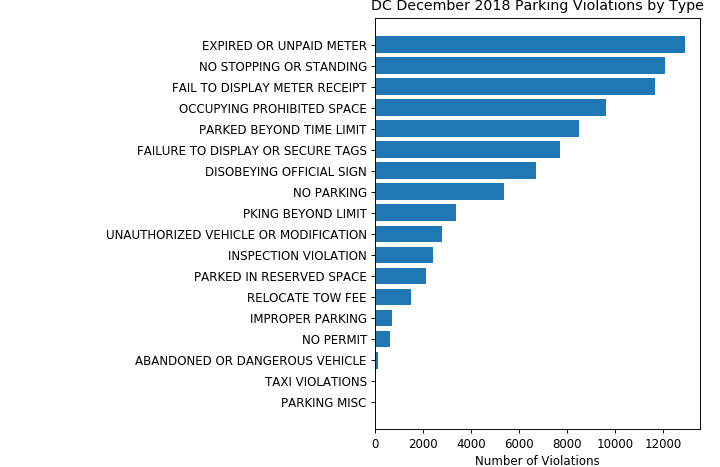

In [33]:
plt.barh(Y,X)
plt.tight_layout()

plt.title("DC December 2018 Parking Violations by Type")
plt.xlabel("Number of Violations")

plt.show()

plt.savefig("Output/Violation_Type.png", bbox_inches="tight")
